<a href="https://colab.research.google.com/github/iamismail471/cvv/blob/master/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        id  age  gender      region  ...  save_act current_act  mortgage   pl
0  ID12101   48  FEMALE  INNER_CITY  ...        NO          NO        NO  YES
1  ID12102   40    MALE        TOWN  ...        NO         YES       YES   NO
2  ID12103   51  FEMALE  INNER_CITY  ...       YES         YES        NO   NO
3  ID12104   23  FEMALE        TOWN  ...        NO         YES        NO   NO
4  ID12105   57  FEMALE       RURAL  ...       YES          NO        NO   NO
5  ID12106   57  FEMALE        TOWN  ...       YES         YES        NO  YES
6  ID12107   22    MALE       RURAL  ...        NO         YES        NO  YES
7  ID12108   58    MALE        TOWN  ...       YES         YES        NO   NO
8  ID12109   37  FEMALE    SUBURBAN  ...        NO          NO        NO   NO
9  ID12110   54    MALE        TOWN  ...       YES         YES        NO   NO

[10 rows x 12 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


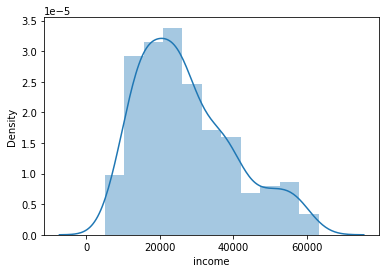

In [1]:

import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/cs1.csv')
print(df.head(10))
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
import scipy.stats as st
 
#Checking Normality of Income Distribution
sns.distplot(df['income'])
plt.show()


In [2]:

print("Sharpiro : ",st.shapiro(df.income))
#Since p value is less than alpha (5%) the distibution does not follow normality.
#p>0.05 the dataset is normal(cannot reject H0)
#p<0.05 the dataset is not normal(can reject H0)


Sharpiro :  (0.9428609013557434, 5.541547221099563e-10)


In [3]:

tab = pd.crosstab(df['pl'],df['save_act'])
tab = tab.T
tab
st.chi2_contingency(tab)


(0.005345157445153201,
 0.9417181196452988,
 1,
 array([[ 56.80606061,  46.19393939],
        [125.19393939, 101.80606061]]))

In [4]:
tab = pd.crosstab(df['pl'],df['gender'])
tab = tab.T
print(tab)


pl      NO  YES
gender         
FEMALE  98   62
MALE    84   86


In [5]:
#print(proportions_ztest([86,62],[170,160]))
 
#chi2_contingency function
#Returns:


In [6]:
 
'''chi2 : float
The test statistic.
 
p : float
The p-value of the test
 
dof : int
Degrees of freedom'''


'chi2 : float\nThe test statistic.\n\np : float\nThe p-value of the test\n\ndof : int\nDegrees of freedom'

[1 3 0 2]


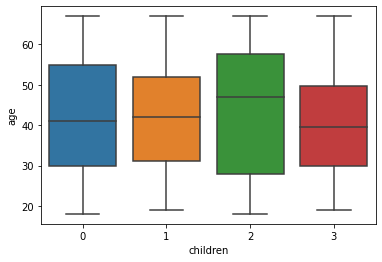

F_onewayResult(statistic=0.40864721912518615, pvalue=0.746891231444784)

In [10]:

print(df.children.unique())
c0 = df[df['children'] == 0]['age']        # c0 = 0 children
c1 = df[df['children'] == 1]['age']
c2 = df[df['children'] == 2]['age']
c3 = df[df['children'] == 3]['age']
sns.boxplot(x='children',y="age",data=df)
plt.show()
st.f_oneway(c0,c1,c2,c3)


In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/titanic_train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C


In [14]:
df.drop(columns=['PassengerId','Name', 'Ticket','Fare','Cabin'],
       inplace=True)
df.dropna(inplace=True)
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
889,1,1,male,26.0,0,0,C


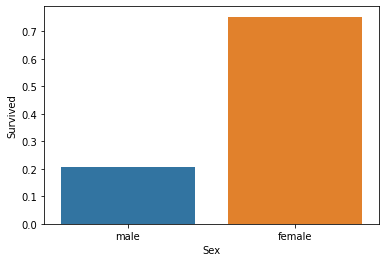

In [15]:
import seaborn as sns
sns.barplot(x='Sex', y='Survived', data=df, ci=None)


In [19]:

tab = pd.crosstab(df['Survived'],df['Embarked'])
tab = tab.T
print(tab)
st.chi2_contingency(tab)


Survived    0    1
Embarked          
C          51   79
Q          20    8
S         353  201


(27.918691003688615,
 8.660306799267924e-07,
 2,
 array([[ 77.41573034,  52.58426966],
        [ 16.6741573 ,  11.3258427 ],
        [329.91011236, 224.08988764]]))

In [ ]:
tab = pd.crosstab(df['Sex'],df['Survived'])
tab = tab.T
print(tab)
st.chi2_contingency(tab)

In [20]:

tab = pd.crosstab(df['Pclass'],df['Embarked'])
tab = tab.T
print(tab)
st.chi2_contingency(tab)

Pclass      1    2    3
Embarked               
C          74   15   41
Q           2    2   24
S         108  156  290


(93.18034874220332,
 2.7775485300373503e-19,
 4,
 array([[ 33.59550562,  31.58707865,  64.81741573],
        [  7.23595506,   6.80337079,  13.96067416],
        [143.16853933, 134.60955056, 276.22191011]]))

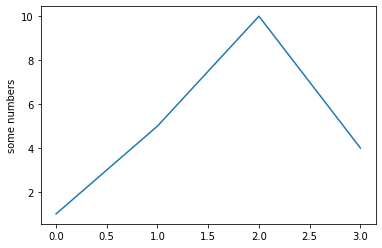

In [23]:
import matplotlib.pyplot as plt
plt.plot([1, 5, 10, 4])
plt.ylabel('some numbers')
plt.show()